In [7]:
import os
import random
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


In [14]:
source_folder = '/exchange/cvai/colorAIzer/data/coco/train2017'
target_folder = '/exchange/cvai/colorAIzer/data/coco_prepared_for_deoldify'

In [9]:
def show_random_image_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    if not image_files:
        print("No images found in the folder.")
        return
    
    # Pick a random image
    img_name = random.choice(image_files)
    img_path = os.path.join(folder_path, img_name)

    # Open and display
    img = Image.open(img_path).convert('RGB')
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

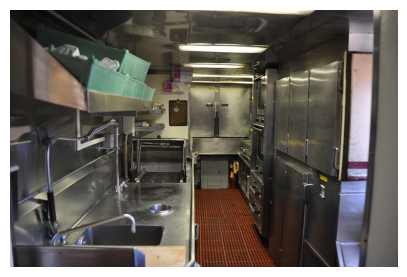

In [15]:
show_random_image_from_folder(source_folder)


In [17]:
def prepare_coco_images(source_dir, target_dir, image_size=256, num_images=10000):
    
    # Create target directory if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # List all images
    image_files = [f for f in os.listdir(source_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Pick a limited number if specified
    image_files = image_files[:num_images]

    print(f"Preparing {len(image_files)} images...")

    for img_name in tqdm(image_files):
        img_path = os.path.join(source_dir, img_name)
        
        try:
            img = Image.open(img_path).convert('RGB')

            # Resize and center-crop
            img = resize_and_crop(img, image_size)

            # Save to target folder
            img.save(os.path.join(target_dir, img_name))

        except Exception as e:
            print(f"Failed to process {img_name}: {e}")

def resize_and_crop(img, size):
    # Resize keeping aspect ratio first
    img.thumbnail((size, size), Image.LANCZOS)

    # Center crop manually if needed
    width, height = img.size
    left = (width - size)/2
    top = (height - size)/2
    right = (width + size)/2
    bottom = (height + size)/2

    img = img.crop((left, top, right, bottom))
    return img


In [18]:
prepare_coco_images(source_folder, target_folder, image_size=256, num_images=10000)

Preparing 10000 images...


100%|██████████| 10000/10000 [01:05<00:00, 153.29it/s]
